# Install and load libraries

In [ ]:
#!conda install -c conda-forge fbprophet

In [13]:
import fbprophet
from fbprophet import Prophet
import pandas as pd
#import matplotlib.pyplot as plt
#import plotly.express as px

# Load and Summarize Dataset 

In [5]:
df = pd.read_csv('../Data/temp_clean.csv')

We can see that as we expected, there are 1668 months worth of data and two columns. The first column is the date and the second is the average temperature in Celsius.

In [6]:
df.head()

,date,Avg_anomalies
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.20
4,1880-05-31,-0.12


In [7]:
df.tail()

,date,Avg_anomalies
1663,2018-08-31,0.73
1664,2018-09-30,0.76
1665,2018-10-31,0.99
1666,2018-11-30,0.78
1667,2018-12-31,0.89


In [8]:
df.shape

(1668, 2)

## Plot the time series


We can clearly see the trend in average temperature over time and a monthly seasonal pattern to the temperature. These are patterns we expect the forecast model to take into account.

In [23]:
fig = px.line(df, x="date", y="Avg_anomalies",  title='Evolution of average temperatures sales over time')
fig.show()

# Forecast Car Sales With Prophet

In this section, we will explore using the Prophet to forecast the anomalies temperature dataset.

## Fit Prophet Model

To use Prophet for forecasting:

1. A **Prophet()** object is defined and configured,


2. Fit on the dataset by calling the **fit()** function and passing the data.

The fit() function takes a DataFrame of time series data. The DataFrame must have a specific format: 

1. The first column must have the name ‘ds‘ and contain the date-times. 
2. The second column must have the name ‘y‘ and contain the observations.

In [9]:
df.dtypes

date              object
Avg_anomalies    float64
dtype: object

In [10]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])



In [11]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
!pip install pystan==2.18.0

In [14]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -54.0013


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2784.17    0.00211607       110.744      0.6503      0.6503      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169        2794.4   0.000669046       129.122   2.742e-06       0.001      231  LS failed, Hessian reset 
     199       2797.26   2.05312e-05       57.2649       0.142       0.142      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       2798.82    0.00056925       132.605   4.177e-06       0.001      396  LS failed, Hessian reset 
     294       2799.28   1.82064e-09       98.2704   1.465e-07     0.09791      431   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


[Here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) is a reference to the acceptable freq parameter aliases

In [15]:
# We want to predict the next 50 years, so I set a period of 50. In this step I have created a dataframe with the dates of the next 50 years.
future = model.make_future_dataframe(periods=50, freq='Y')
future.tail()

,ds
1713,2064-12-31
1714,2065-12-31
1715,2066-12-31
1716,2067-12-31
1717,2068-12-31


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

- `ds`: the datestamp of the forecasted value
- `yhat`: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
- `yhat_lower`: the lower bound of our forecasts
- `yhat_upper`: the upper bound of our forecasts
  
A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

In [16]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1713,2064-12-31,1.627209,1.345818,1.890316
1714,2065-12-31,1.639689,1.361053,1.920533
1715,2066-12-31,1.652283,1.369978,1.925935
1716,2067-12-31,1.664994,1.392652,1.932417
1717,2068-12-31,1.697732,1.414008,1.978930


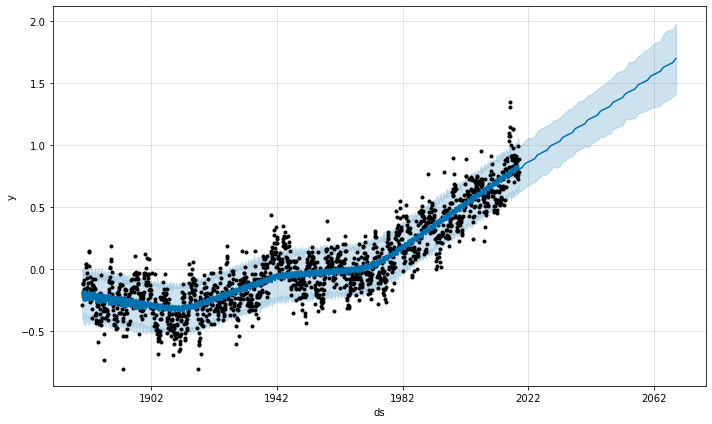

In [17]:
# uncertainty is the error of our predictions
fig1 = model.plot(forecast, uncertainty = True)